<a href="https://colab.research.google.com/github/Sreejan09/ML---Assignment---2/blob/master/task2_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended --quiet

from latexify import latexify
latexify(columns = 2)

Reading package lists...
Building dependency tree...
Reading state information...
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import soundfile

%matplotlib inline
%config InlineBackend.figure_format = "retina"

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)

cpu


--2024-09-15 14:05:27--  https://wynk.in/music/album/om-shanti-om/hu_271591?q=om+shan
Resolving wynk.in (wynk.in)... 18.238.136.80, 18.238.136.108, 18.238.136.9, ...
Connecting to wynk.in (wynk.in)|18.238.136.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘hu_271591?q=om+shan’

hu_271591?q=om+shan     [     <=>            ] 321.96K   382KB/s    in 0.8s    

2024-09-15 14:05:29 (382 KB/s) - ‘hu_271591?q=om+shan’ saved [329689]



In [6]:
from IPython.display import Audio
Audio('song.mp3')

In [7]:
import torchaudio
audio, sr = torchaudio.load('./song.mp3')

In [8]:
sr

44100

In [9]:
print(audio.shape)
audio = audio[0]

torch.Size([2, 7801391])


In [10]:
tm = audio.shape[0] / sr
print(f"Audio length: {tm} seconds")

Audio length: 176.9022902494331 seconds


In [11]:
audio

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [12]:
def audio_plot(audio, sr, clr, tl):
    plt.figure(figsize=(15, 4))
    plt.plot(audio, color = clr, alpha = 0.7)
    plt.xticks(np.arange(0, audio.shape[0], sr), np.arange(0, audio.shape[0] / sr, 1))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(tl)
    plt.grid()
    plt.show()

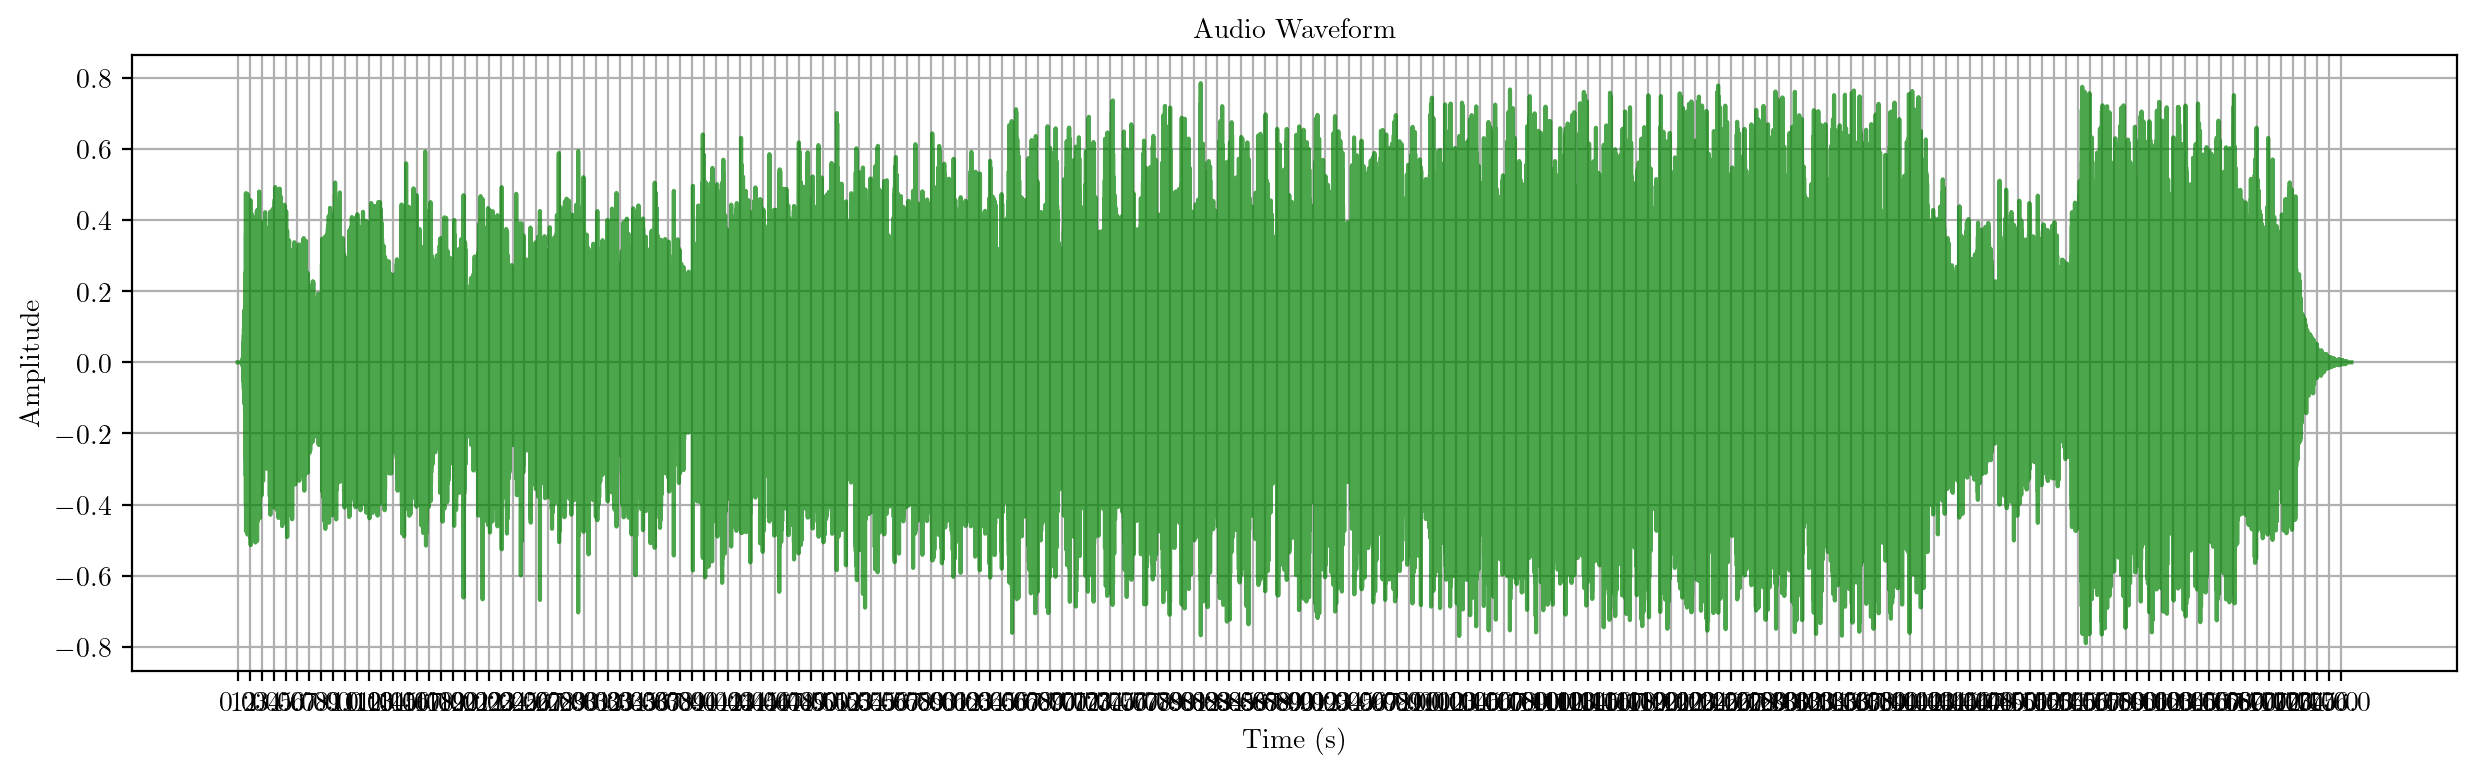

In [13]:
audio_plot(audio, sr, 'green', 'Audio Waveform')

In [14]:
audio = audio[5 * sr:]
print(audio.shape)
print(audio)

torch.Size([7580891])
tensor([0.0868, 0.0766, 0.0621,  ..., 0.0000, 0.0000, 0.0000])


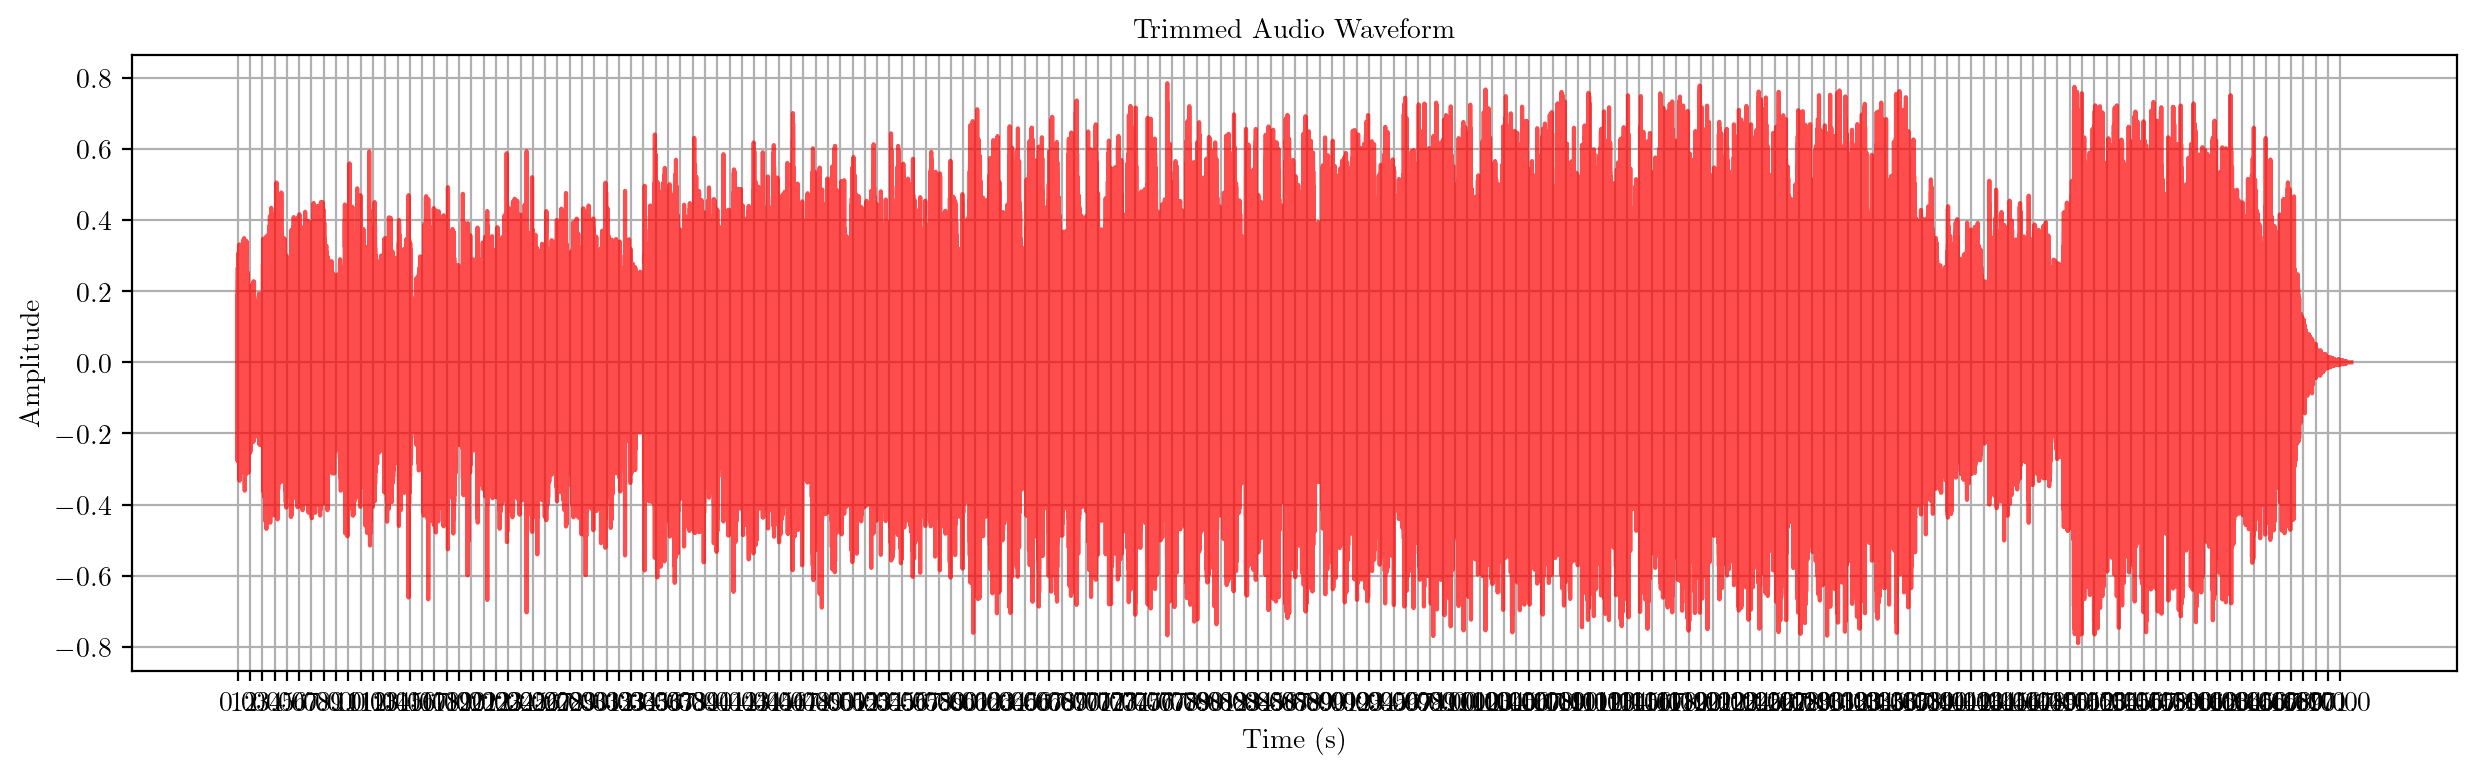

In [15]:
audio_plot(audio, sr, 'red', 'Trimmed Audio Waveform')

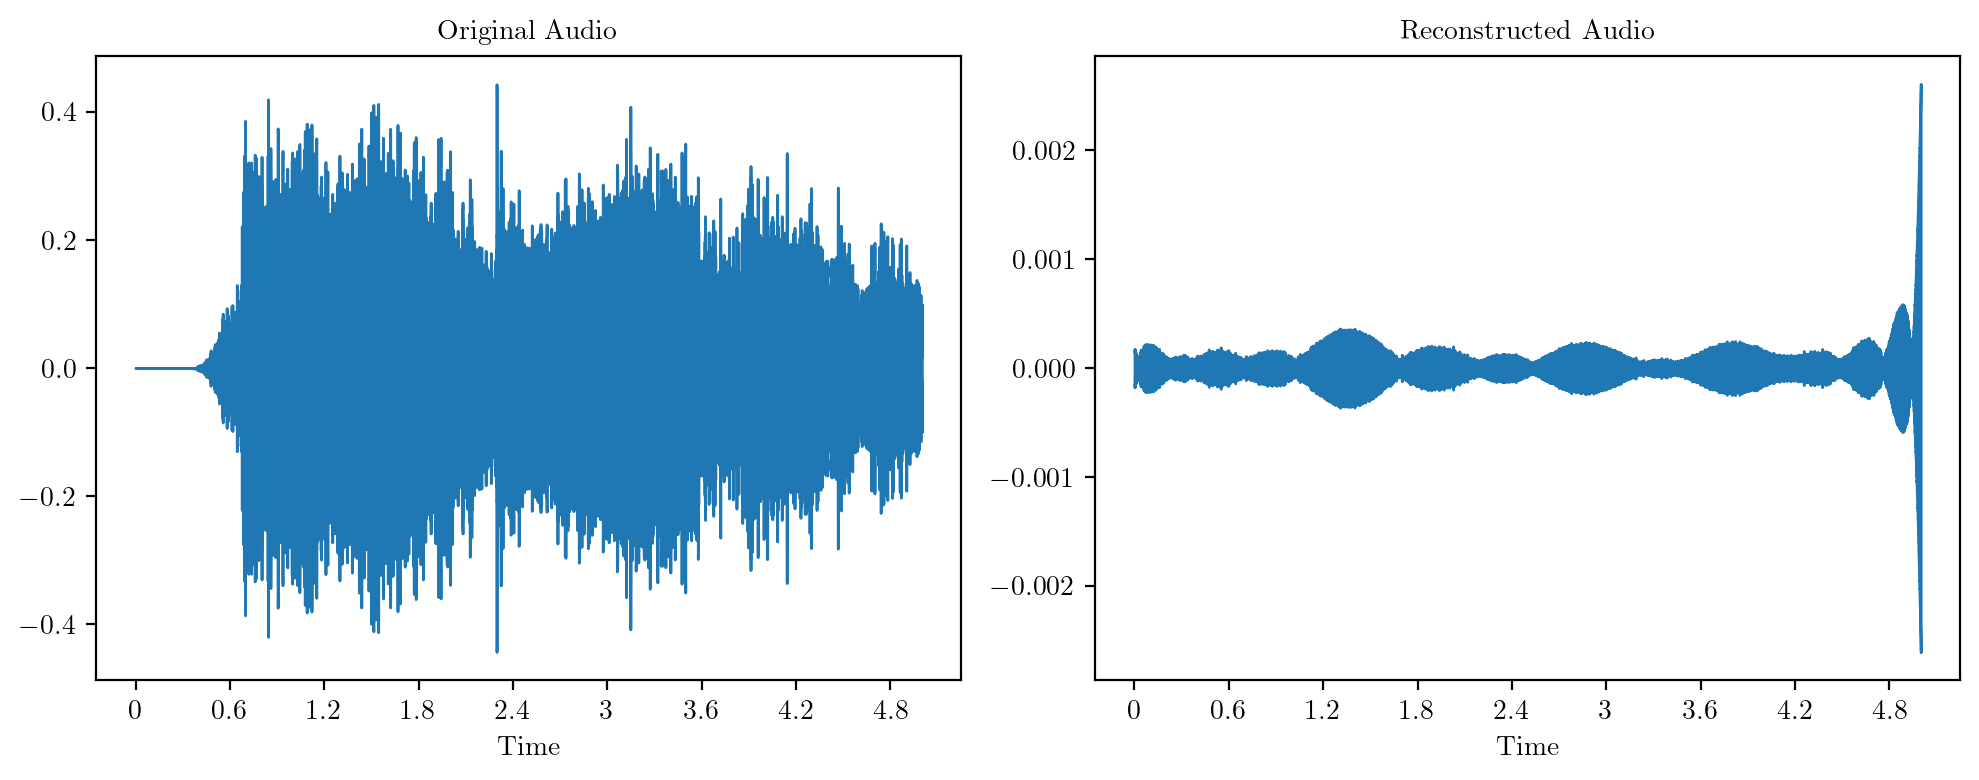

RMSE: 0.1003
SNR: 0.0000 dB
Playing original audio:


Playing reconstructed audio:


In [16]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error
from scipy import signal

# Load the audio file (you can replace this with any 5-second audio clip)
audio_path = 'song.mp3'  # Replace with your audio file path
audio, sr = librosa.load(audio_path, sr=None, duration=5)

# Generate time values
t = np.linspace(0, len(audio) / sr, len(audio))

# Initialize Random Fourier Features and Linear Regression
rff = RBFSampler(gamma=0.1, n_components=1000, random_state=42)
X_rff = rff.fit_transform(t.reshape(-1, 1))
model = LinearRegression()

# Fit the linear model
model.fit(X_rff, audio)

# Predict audio using the learned model
audio_pred = model.predict(X_rff)

# Save the reconstructed audio to a new file
sf.write('reconstructed_audio.wav', audio_pred, sr)

# Plot original and reconstructed audio signals
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Audio')
librosa.display.waveshow(audio, sr=sr)
plt.subplot(1, 2, 2)
plt.title('Reconstructed Audio')
librosa.display.waveshow(audio_pred, sr=sr)
plt.tight_layout()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(audio, audio_pred))
print(f'RMSE: {rmse:.4f}')

# Calculate Signal-to-Noise Ratio (SNR)
noise = audio - audio_pred
snr = 10 * np.log10(np.mean(audio ** 2) / np.mean(noise ** 2))
print(f'SNR: {snr:.4f} dB')

# Play original and reconstructed audio
# If you're using Jupyter, you can play the audio with IPython.display.Audio
import IPython.display as ipd
print("Playing original audio:")
ipd.display(ipd.Audio(audio, rate=sr))

print("Playing reconstructed audio:")
ipd.display(ipd.Audio(audio_pred, rate=sr))


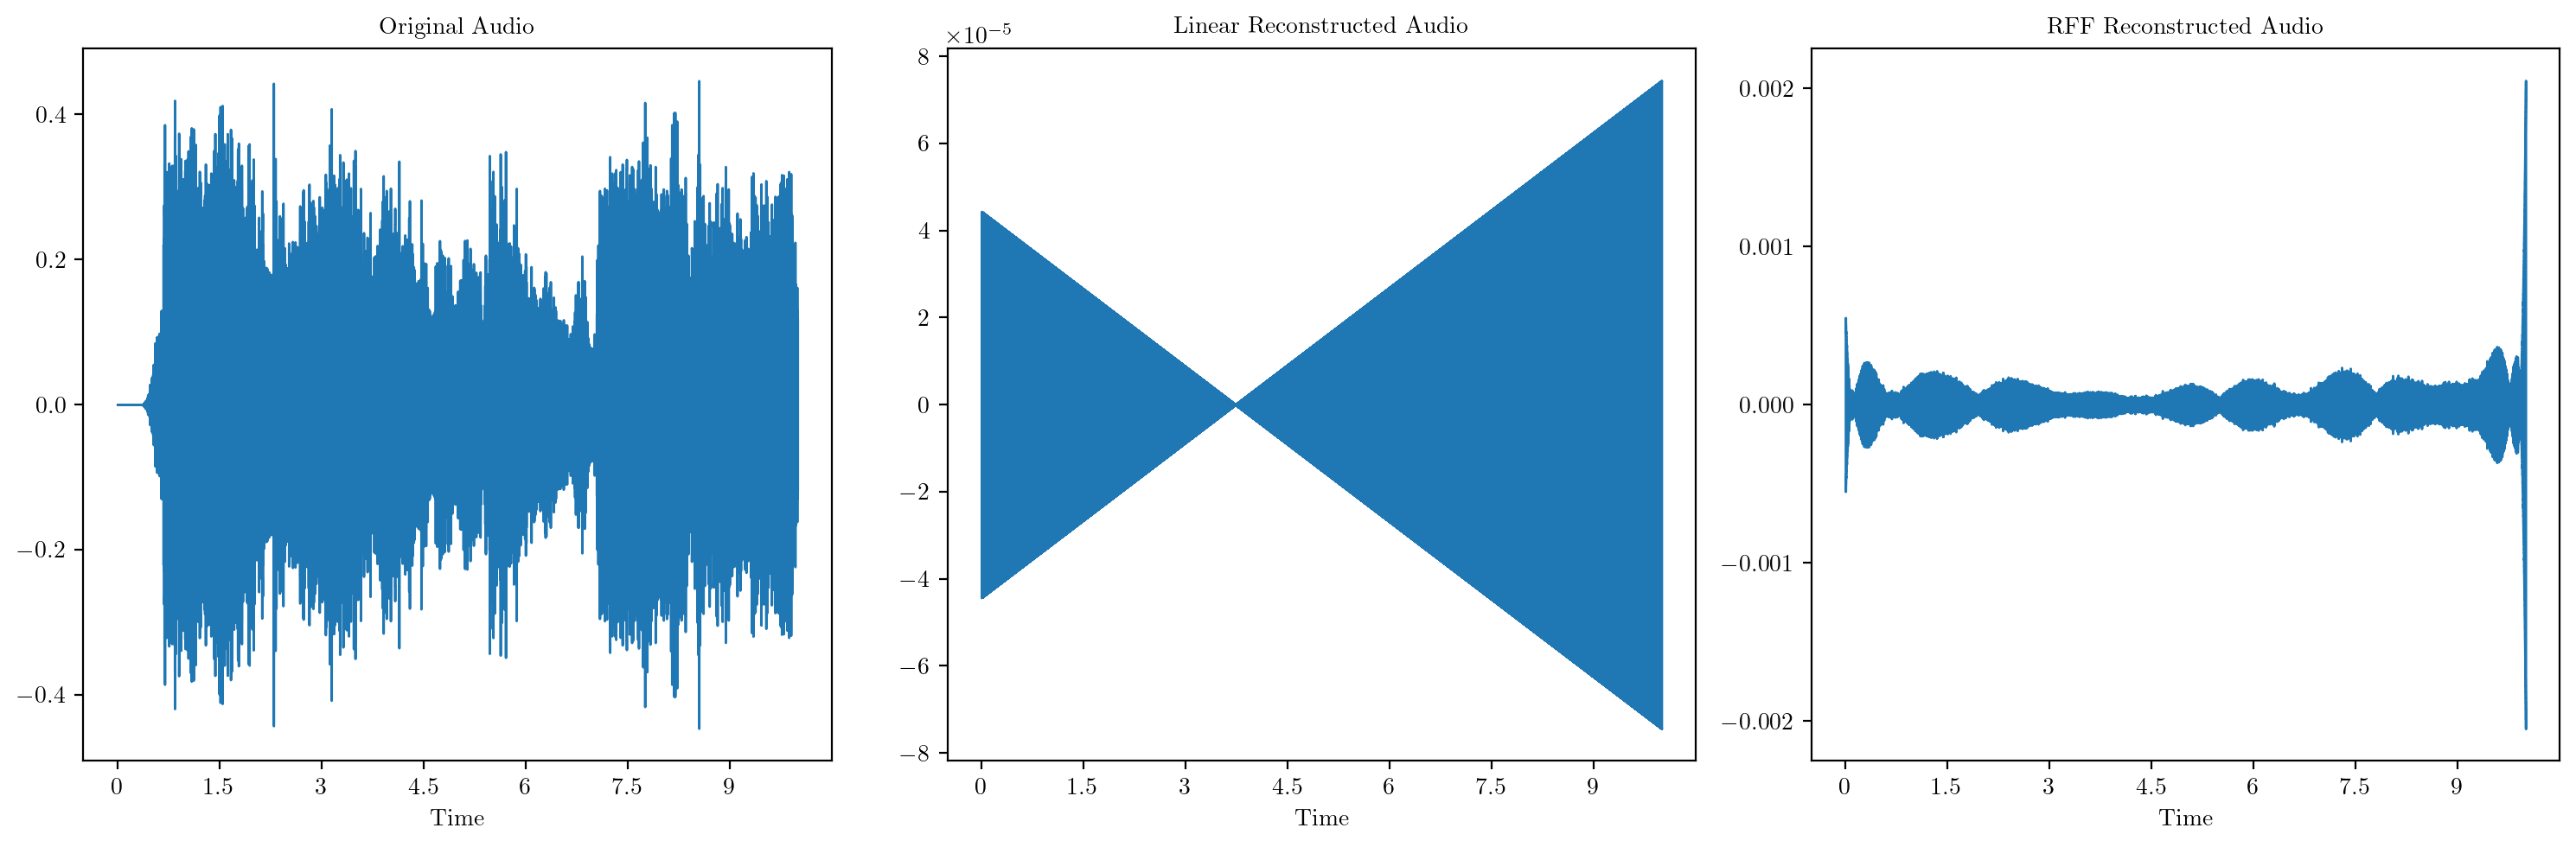

RMSE (Linear): 0.0993
RMSE (RFF): 0.0993
SNR (Linear): 0.0000 dB
SNR (RFF): 0.0000 dB
Playing original audio:


Playing linear reconstructed audio:


Playing RFF reconstructed audio:


In [19]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error
import IPython.display as ipd

# Load the audio file (you can replace this with any 5-second audio clip)
audio_path = 'song.mp3'  # Replace with your audio file path
audio, sr = librosa.load(audio_path, sr=None, duration=10)

# Generate time values
t = np.linspace(0, len(audio) / sr, len(audio))

# Linear Regression Model (without RFF)
model_linear = LinearRegression()
model_linear.fit(t.reshape(-1, 1), audio)
audio_pred_linear = model_linear.predict(t.reshape(-1, 1))

# Random Fourier Features (RFF) + Linear Regression
rff = RBFSampler(gamma=0.1, n_components=1000, random_state=42)
X_rff = rff.fit_transform(t.reshape(-1, 1))

model_rff = LinearRegression()
model_rff.fit(X_rff, audio)
audio_pred_rff = model_rff.predict(X_rff)

# Save the reconstructed audio files
sf.write('linear_reconstructed_audio.wav', audio_pred_linear, sr)
sf.write('rff_reconstructed_audio.wav', audio_pred_rff, sr)

# Plot original, linear, and RFF-reconstructed audio signals
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Audio')
librosa.display.waveshow(audio, sr=sr)

plt.subplot(1, 3, 2)
plt.title('Linear Reconstructed Audio')
librosa.display.waveshow(audio_pred_linear, sr=sr)

plt.subplot(1, 3, 3)
plt.title('RFF Reconstructed Audio')
librosa.display.waveshow(audio_pred_rff, sr=sr)

plt.tight_layout()
plt.show()

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(audio, audio_pred_linear))
rmse_rff = np.sqrt(mean_squared_error(audio, audio_pred_rff))
print(f'RMSE (Linear): {rmse_linear:.4f}')
print(f'RMSE (RFF): {rmse_rff:.4f}')

# Calculate Signal-to-Noise Ratio (SNR)
def calculate_snr(original, reconstructed):
    noise = original - reconstructed
    snr = 10 * np.log10(np.mean(original ** 2) / np.mean(noise ** 2))
    return snr

snr_linear = calculate_snr(audio, audio_pred_linear)
snr_rff = calculate_snr(audio, audio_pred_rff)
print(f'SNR (Linear): {snr_linear:.4f} dB')
print(f'SNR (RFF): {snr_rff:.4f} dB')

# Play original, linear reconstructed, and RFF reconstructed audio
print("Playing original audio:")
ipd.display(ipd.Audio(audio, rate=sr))

print("Playing linear reconstructed audio:")
ipd.display(ipd.Audio(audio_pred_linear, rate=sr))

print("Playing RFF reconstructed audio:")
ipd.display(ipd.Audio(audio_pred_rff, rate=sr))
